In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from arch import arch_model
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [2]:
pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ------------------------------------- 948.2/948.2 kB 14.6 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139012 sha256=1e790b6e11860ae3c5491a3d377ec730ffb68681cba231821afeb94bcd41d51d
  Stored in directory: c:\users\lenovo pc\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Installer les packages nécessaires
# pip install yfinance pandas

import yfinance as yf
import pandas as pd

# Définir le ticker et la plage de dates
ticker = "NVDA"
start_date = "2020-01-01"
end_date = "2024-12-31"

# Récupérer les données depuis Yahoo Finance
nvidia_data = yf.download(ticker, start=start_date, end=end_date)

# Afficher les premières lignes des données
print(nvidia_data.head())

# Convertir en DataFrame et inclure une colonne 'date'
nvidia_df = nvidia_data.reset_index()
print(nvidia_df.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
2020-01-03  5.877112  5.920928  5.828067  5.852963  205384000
2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
2020-01-07  5.973208  6.019016  5.885078  5.930139  314856000
2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000
Price        Date     Close      High       Low      Open     Volume
Ticker                 NVDA      NVDA      NVDA      NVDA       NVDA
0      2020-01-02  5.972711  5.972711  5.893294  5.943832  237536000
1      2020-01-03  5.877112  5.920928  5.828067  5.852963  205384000
2      2020-01-06  5.901759  5.906987  5.757614  5.783754  262636000
3      2020-01-07  5.973208  6.019016  5.885078  5.930139  314856000
4      2020-01-08  5.984411  6.025738  5.928894  5.968976  277108000


In [6]:
summary = nvidia_df.describe()
summary

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
count,1257,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,2022-06-30 22:13:27.637231616,38.369700,39.077611,37.595167,38.371132,4.470372e+08
min,2020-01-02 00:00:00,4.892426,5.229714,4.500833,4.984595,9.788400e+07
25%,2021-04-01 00:00:00,13.572305,13.824405,13.333922,13.601479,3.088640e+08
50%,2022-06-30 00:00:00,21.226318,21.729197,20.795876,21.168408,4.212450e+08
75%,2023-09-29 00:00:00,45.564079,46.200838,44.902618,45.702026,5.470070e+08
max,2024-12-30 00:00:00,148.869751,152.879470,146.249911,149.339720,1.543911e+09
std,NaN,38.153295,38.859773,37.405898,38.207275,1.876080e+08


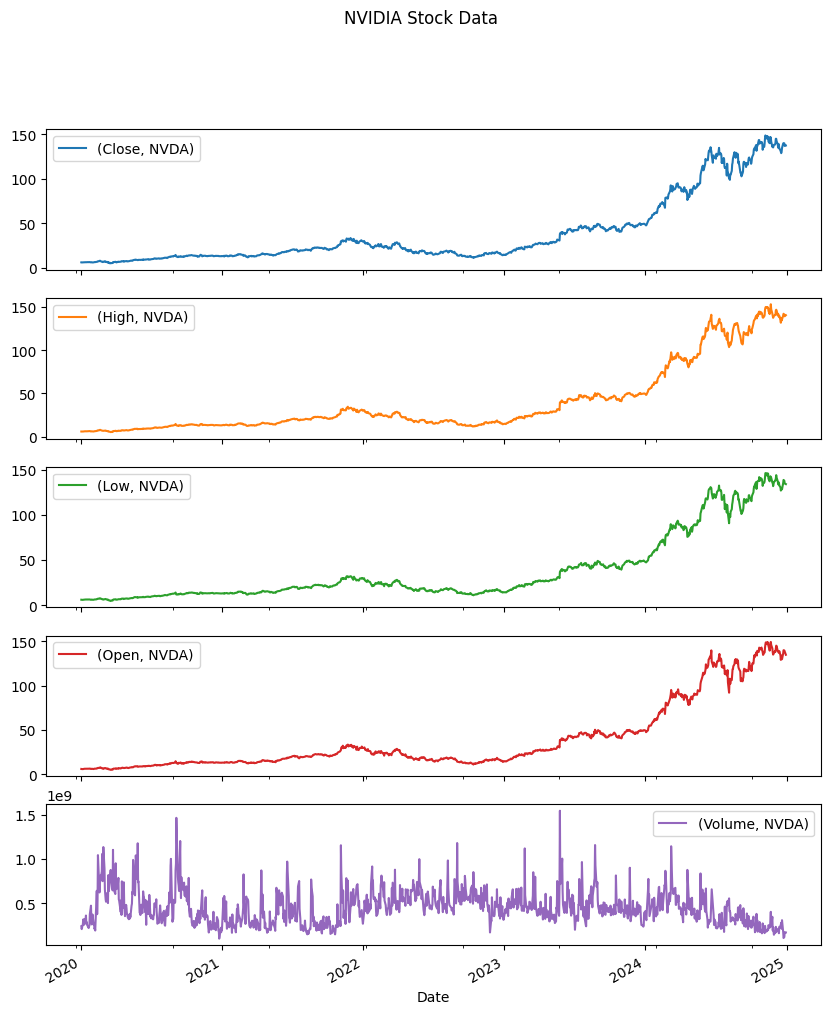

In [7]:
import matplotlib.pyplot as plt

# Tracer toutes les colonnes par rapport à la date
nvidia_df.plot(x='Date', subplots=True, figsize=(10, 12), title='NVIDIA Stock Data')
plt.show()

In [10]:
nvidia_df.rename(columns={'Adj Close': 'Adj_Close',
                          'Close,NVDA': 'Close',
                          'High,NVDA': 'High',
                          'Low,NVDA': 'Low',
                            'Open,NVDA': 'Open',
                            'Volume,NVDA': 'Volume',
                             }, inplace=True)

In [13]:
nvidia_df.Date = pd.to_datetime(nvidia_df.Date)

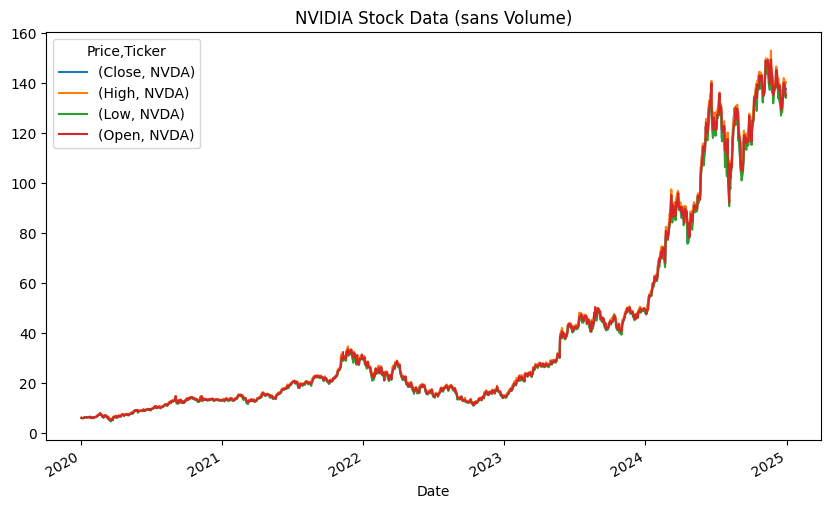

In [14]:
# Tracer toutes les colonnes sauf le volume par rapport à la date
nvidia_df.plot(x='Date', y=['Close', 'High', 'Low', 'Open'], figsize=(10, 6), title='NVIDIA Stock Data (sans Volume)')
plt.show()

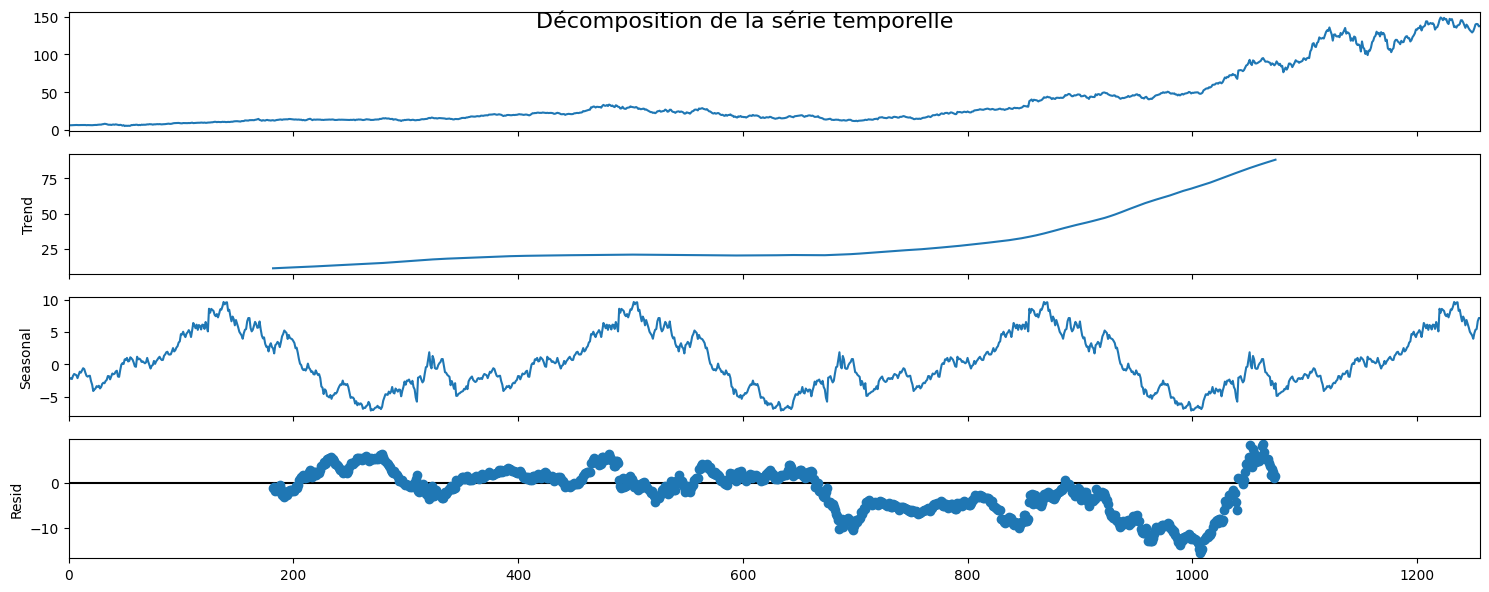

In [16]:

# Créer une série temporelle à partir de la colonne 'Close'
nvidia_ts = nvidia_df['Close']

# Décomposer la série temporelle
decomposition = seasonal_decompose(nvidia_ts, model='additive', period=365)

# Affichage des résultats
decomposition.plot()
plt.suptitle('Décomposition de la série temporelle', fontsize=16)
plt.show()


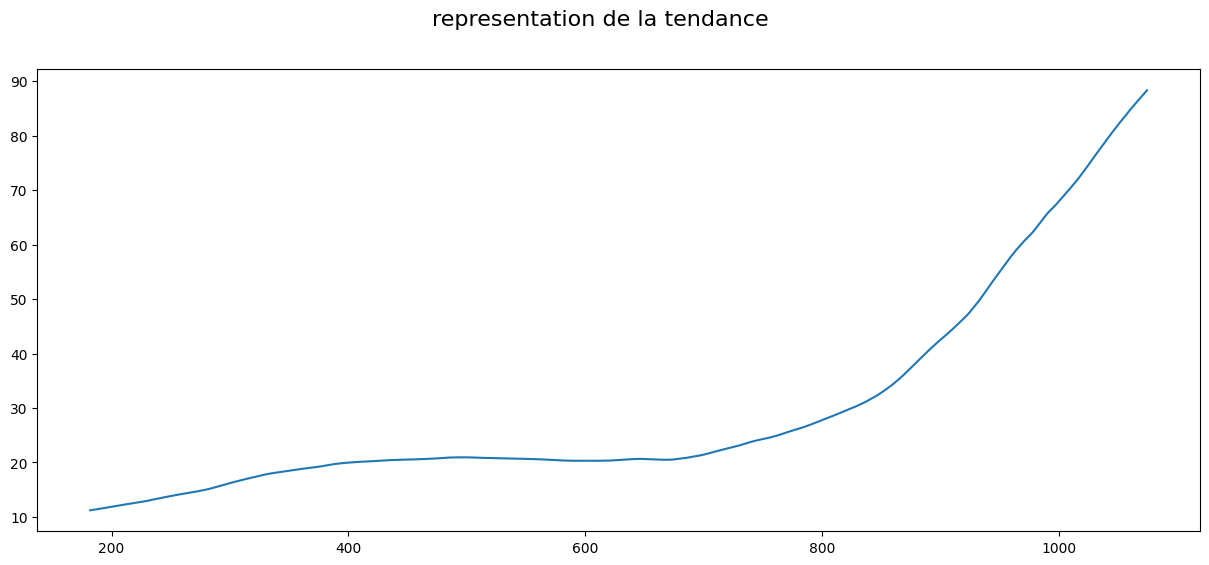

In [17]:
tendance = decomposition.trend
tendance.plot()
plt.suptitle('representation de la tendance', fontsize=16)
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(nvidia_ts['NVDA'])

# Extraire les résultats
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Afficher les résultats
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

ADF Statistic: 1.1101207242905926
p-value: 0.995302079937024
Critical Values:
   1%: -3.4356560275160835
   5%: -2.8638831211270817
   10%: -2.568017509711682


La seie n'est pas stationnaire on applique donc la diferenciation

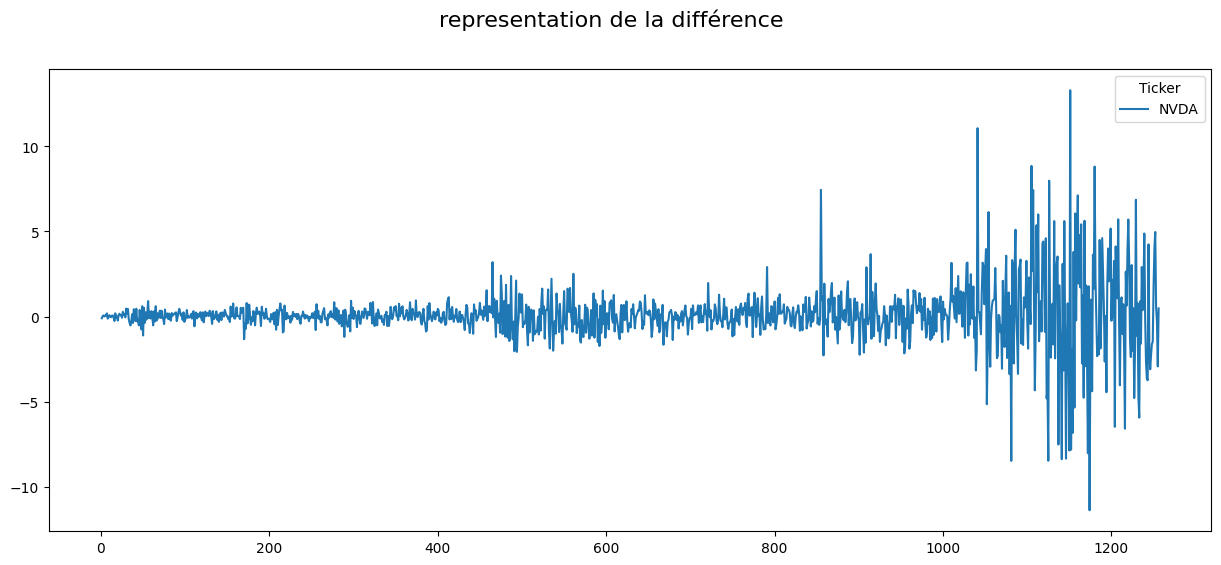

In [21]:
nvidia_ts_dif=nvidia_ts.diff().dropna()
nvidia_ts_dif.plot()
plt.suptitle('representation de la différence', fontsize=16)
plt.show()

In [22]:

# Effectuer le test de Dickey-Fuller augmenté sur la série de différences
result_dif = adfuller(nvidia_ts_dif['NVDA'])

# Extraire les résultats
adf_statistic_dif = result_dif[0]
p_value_dif = result_dif[1]
critical_values_dif = result_dif[4]

# Afficher les résultats
print('ADF Statistic (diff):', adf_statistic_dif)
print('p-value (diff):', p_value_dif)
print('Critical Values (diff):')
for key, value in critical_values_dif.items():
    print(f'   {key}: {value}')

# Déterminer si la série est stationnaire
if adf_statistic_dif < critical_values_dif['5%']:
    print("La série de différences est stationnaire.")
else:
    print("La série de différences n'est pas stationnaire.")

ADF Statistic (diff): -7.010172105923996
p-value (diff): 6.954667495135061e-10
Critical Values (diff):
   1%: -3.4356689751083374
   5%: -2.8638888336592387
   10%: -2.5680205519744055
La série de différences est stationnaire.


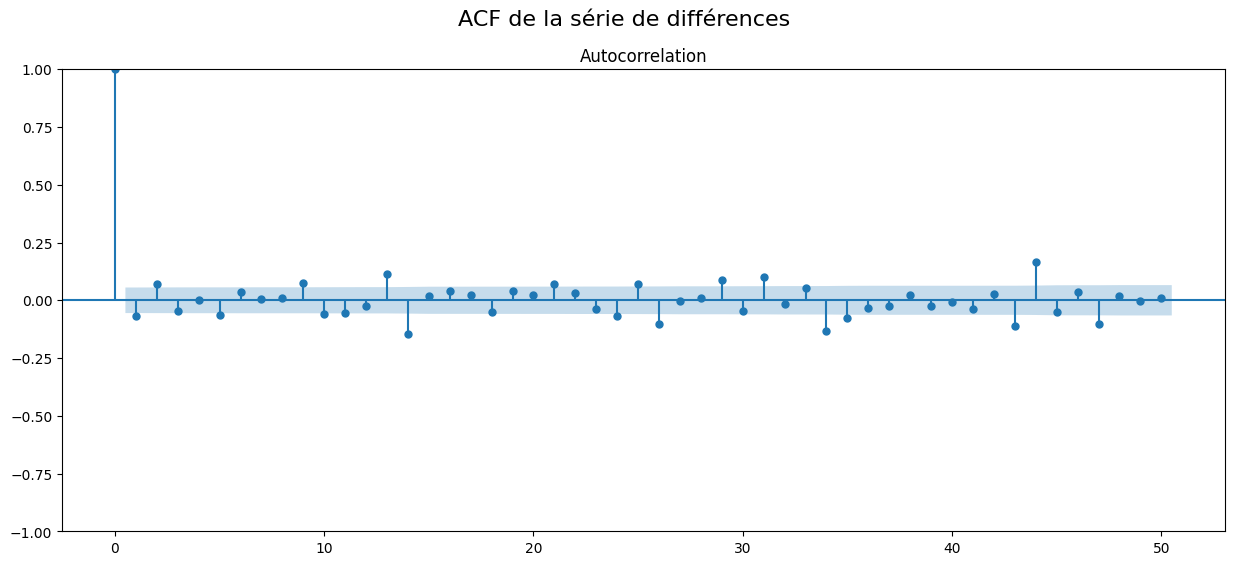

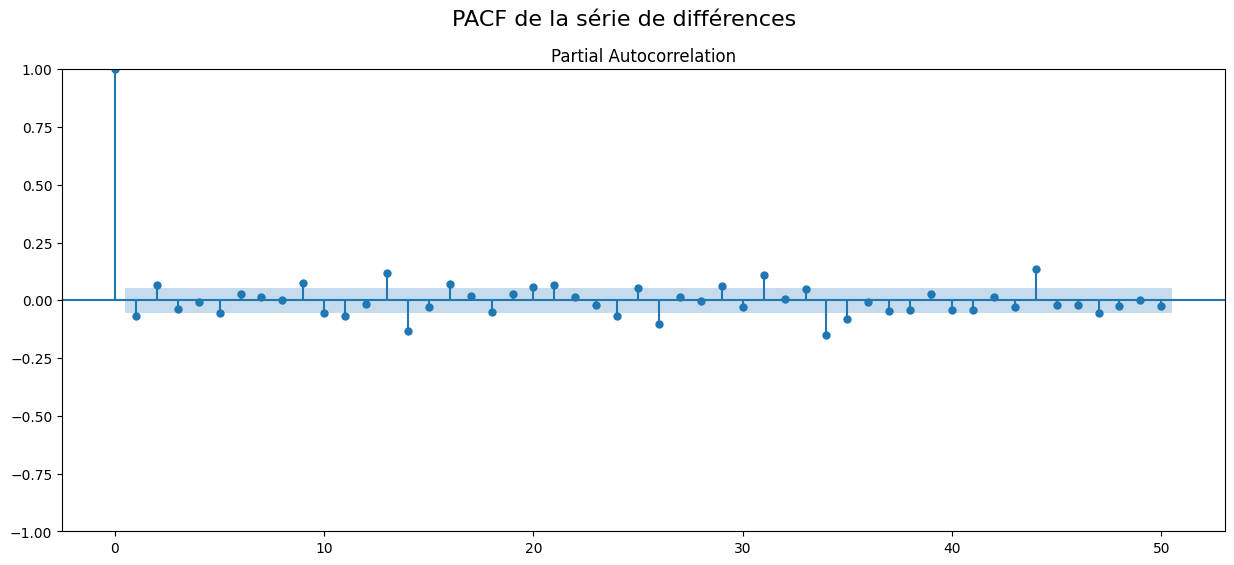

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Représentation de l'ACF
plot_acf(nvidia_ts_dif['NVDA'], lags=50)
plt.suptitle('ACF de la série de différences', fontsize=16)
plt.show()

# Représentation du PACF
plot_pacf(nvidia_ts_dif['NVDA'], lags=50)
plt.suptitle('PACF de la série de différences', fontsize=16)
plt.show()

In [24]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Ignorer les avertissements
warnings.filterwarnings("ignore")

# Initialiser les variables pour stocker les meilleurs modèles
best_aic = float("inf")
best_bic = float("inf")
best_order_aic = None
best_order_bic = None
best_model_aic = None
best_model_bic = None

# Faire varier les ordres p et q entre 0 et 5
for p in range(6):
    for q in range(6):
        try:
            # Ajuster le modèle ARIMA
            model = ARIMA(nvidia_ts_dif['NVDA'], order=(p, 0, q))
            results = model.fit()

            # Vérifier et mettre à jour le meilleur modèle selon AIC
            if results.aic < best_aic:
                best_aic = results.aic
                best_order_aic = (p, 0, q)
                best_model_aic = results

            # Vérifier et mettre à jour le meilleur modèle selon BIC
            if results.bic < best_bic:
                best_bic = results.bic
                best_order_bic = (p, 0, q)
                best_model_bic = results

        except Exception as e:
            continue

# Afficher les résultats
print(f"Meilleur modèle selon AIC: ARIMA{best_order_aic} - AIC:{best_aic}")
print(f"Meilleur modèle selon BIC: ARIMA{best_order_bic} - BIC:{best_bic}")

Meilleur modèle selon AIC: ARIMA(5, 0, 5) - AIC:4857.429568406259
Meilleur modèle selon BIC: ARIMA(0, 0, 0) - BIC:4904.756403265418


Donc on retient le modele ARIMA(5,1,5)

In [ ]:


# Ajuster le modèle ARIMA
best_model = ARIMA(nvidia_ts, order=(5, 1, 5))  # Spécifiez les ordres (p, d, q)
fitted_model = best_model.fit()  # Ajustement du modèle

# Effectuer des prédictions
predictions = fitted_model.predict(start=0, end=len(nvidia_ts)-1, dynamic=False)

# Tracer la série originale et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(nvidia_ts, label='Série d\'origine', color='blue')
plt.plot(predictions, label='Prédictions', color='red', linestyle='--')
plt.legend()
plt.title('Série originale et prédictions ARIMA')
plt.show()

TypeError: Model.predict() missing 1 required positional argument: 'params'

In [34]:
# Ajuster le modèle ARIMA
best_model = ARIMA(nvidia_ts, order=(5, 1, 5))
fitted_model = best_model.fit()

# Effectuer des prédictions sur 10 périodes
forecast = fitted_model.forecast(steps=10)

predictions_10=pd.DataFrame(forecast)
# Afficher les prédictions
predictions_10

,predicted_mean
1257,138.107595
1258,137.552175
1259,137.244104
1260,137.497188
1261,138.006575
1262,137.423519
1263,137.313445
1264,137.615126
1265,137.894518
1266,137.359271


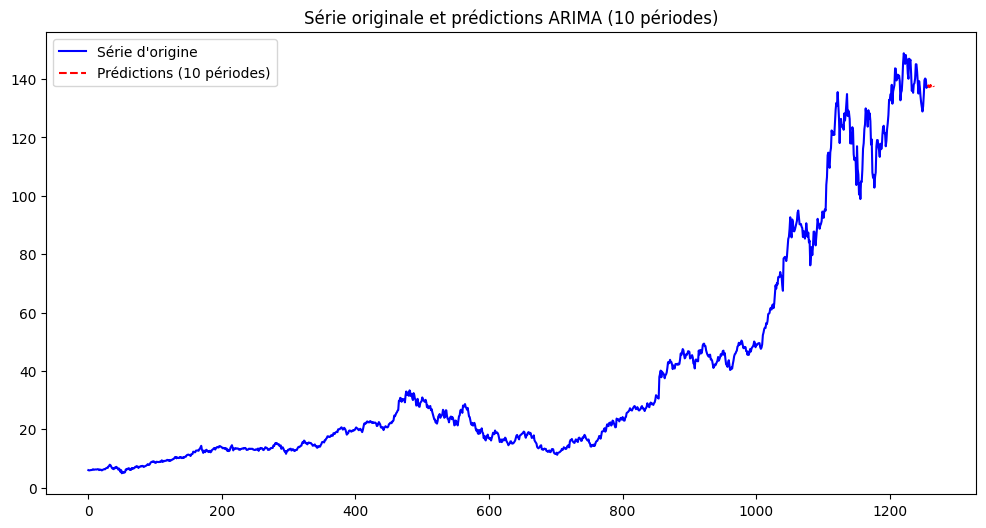

In [35]:
# Tracer la série originale et les 10 prévisions
plt.figure(figsize=(12, 6))
plt.plot(nvidia_ts, label='Série d\'origine', color='blue')
plt.plot(predictions_10.index, predictions_10['predicted_mean'], label='Prédictions (10 périodes)', color='red', linestyle='--')
plt.legend()
plt.title('Série originale et prédictions ARIMA (10 périodes)')
plt.show()

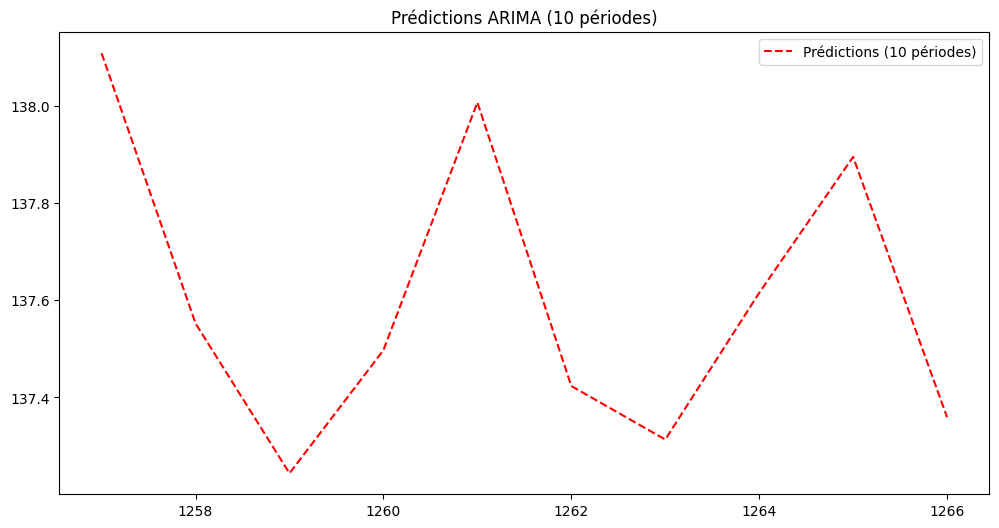

In [36]:
# Tracer uniquement les 10 prévisions
plt.figure(figsize=(12, 6))
plt.plot(predictions_10.index, predictions_10['predicted_mean'], label='Prédictions (10 périodes)', color='red', linestyle='--')
plt.legend()
plt.title('Prédictions ARIMA (10 périodes)')
plt.show()

MODELE GARCH

In [38]:
# Calculer la série des rendements
nvidia_returns = nvidia_df['Close'].pct_change().dropna()


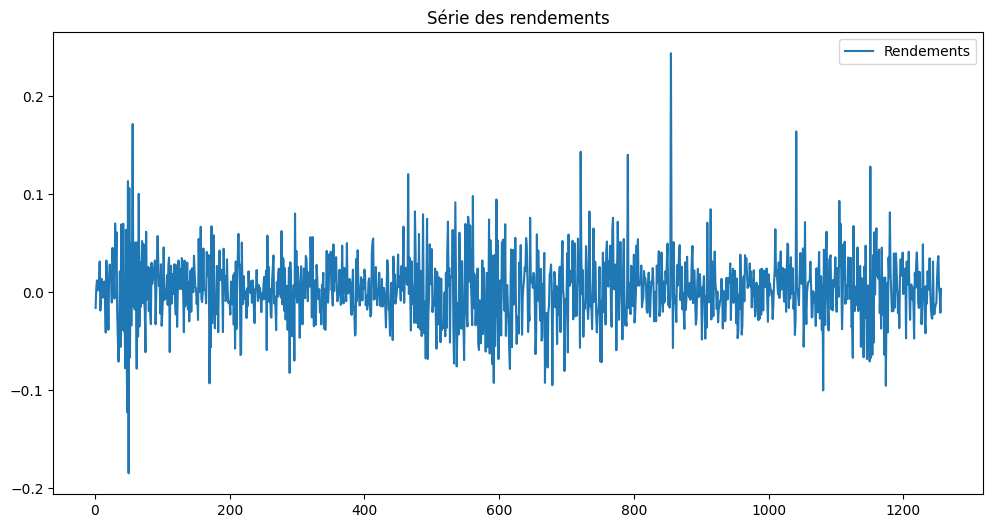

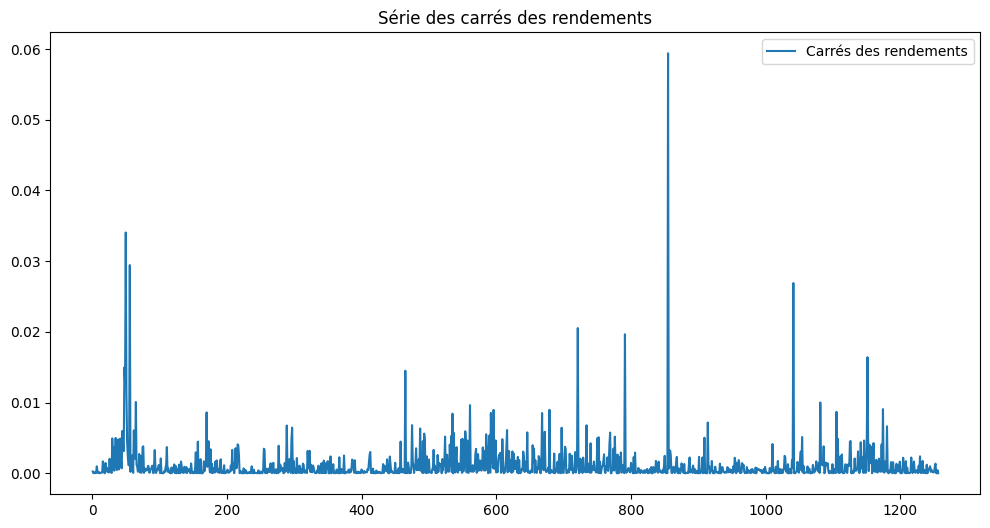

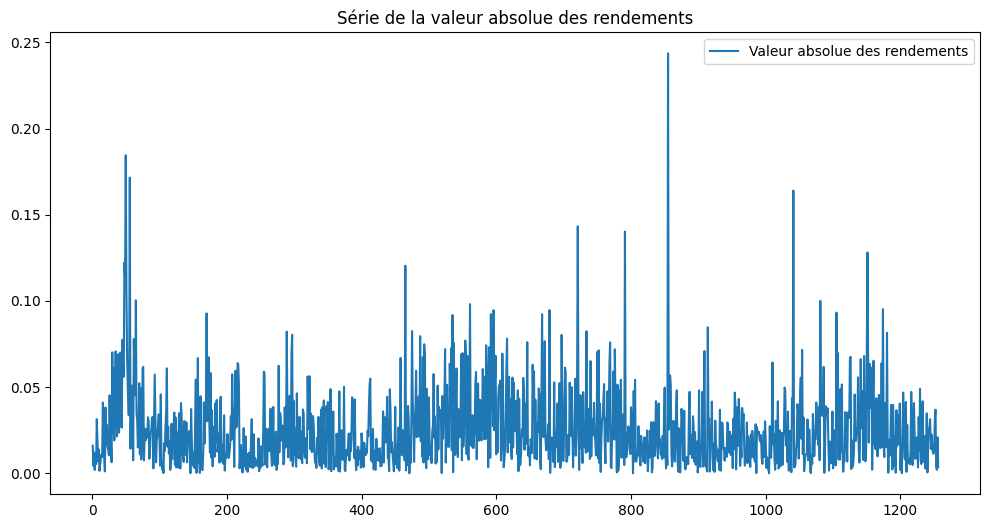

In [39]:

# Tracer la série des rendements
plt.figure(figsize=(12, 6))
plt.plot(nvidia_returns, label='Rendements')
plt.legend()
plt.title('Série des rendements')
plt.show()

# Tracer la série des carrés des rendements
plt.figure(figsize=(12, 6))
plt.plot(nvidia_returns**2, label='Carrés des rendements')
plt.legend()
plt.title('Série des carrés des rendements')
plt.show()

# Tracer la série de la valeur absolue des rendements
plt.figure(figsize=(12, 6))
plt.plot(np.abs(nvidia_returns), label='Valeur absolue des rendements')
plt.legend()
plt.title('Série de la valeur absolue des rendements')
plt.show()

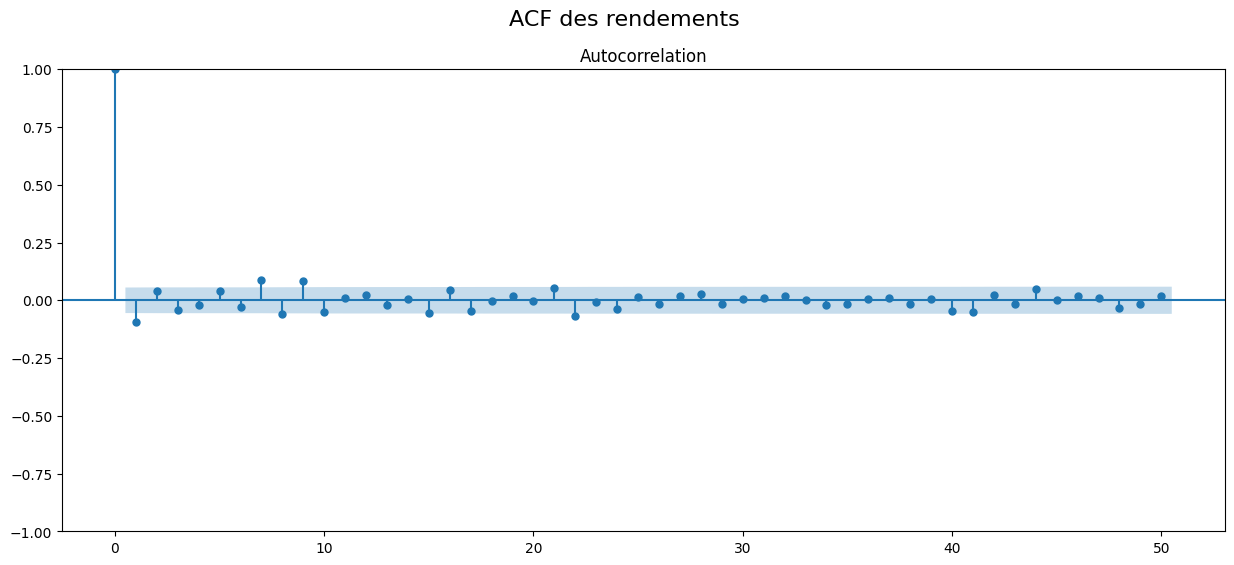

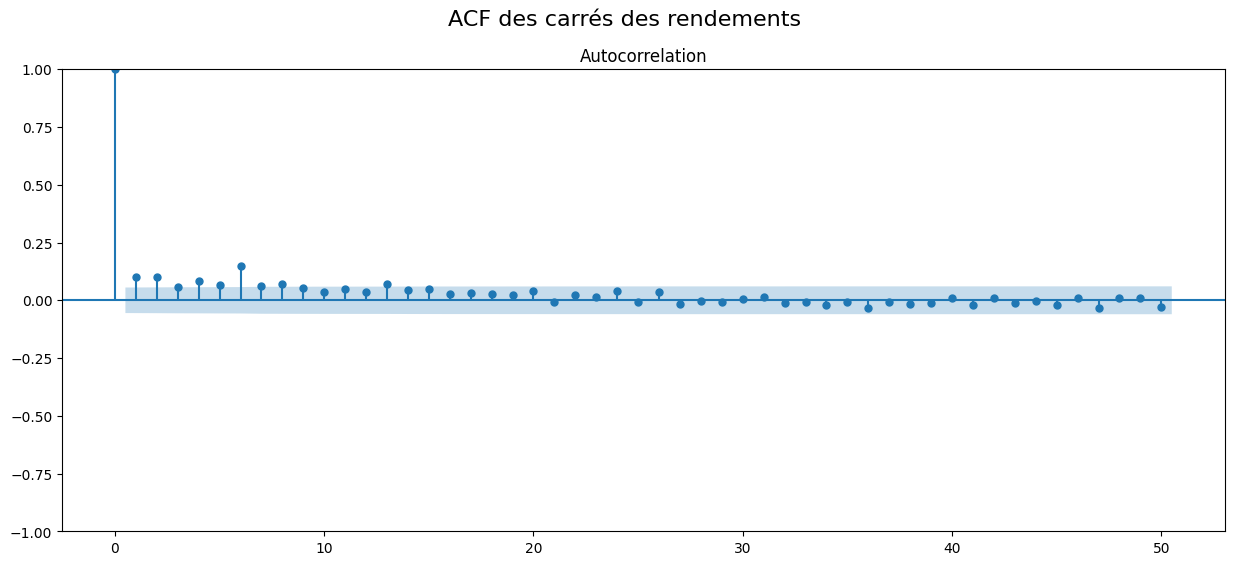

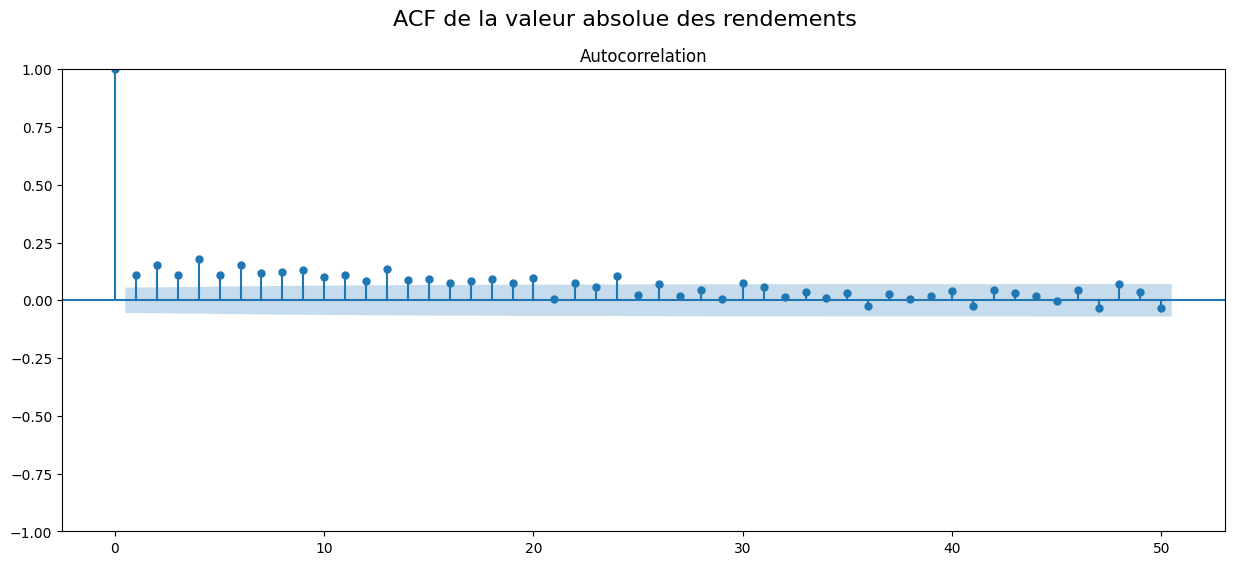

In [40]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer l'ACF des rendements
plot_acf(nvidia_returns['NVDA'], lags=50)
plt.suptitle('ACF des rendements', fontsize=16)
plt.show()

# Tracer l'ACF des carrés des rendements
plot_acf(nvidia_returns['NVDA']**2, lags=50)
plt.suptitle('ACF des carrés des rendements', fontsize=16)
plt.show()

# Tracer l'ACF de la valeur absolue des rendements
plot_acf(np.abs(nvidia_returns['NVDA']), lags=50)
plt.suptitle('ACF de la valeur absolue des rendements', fontsize=16)
plt.show()

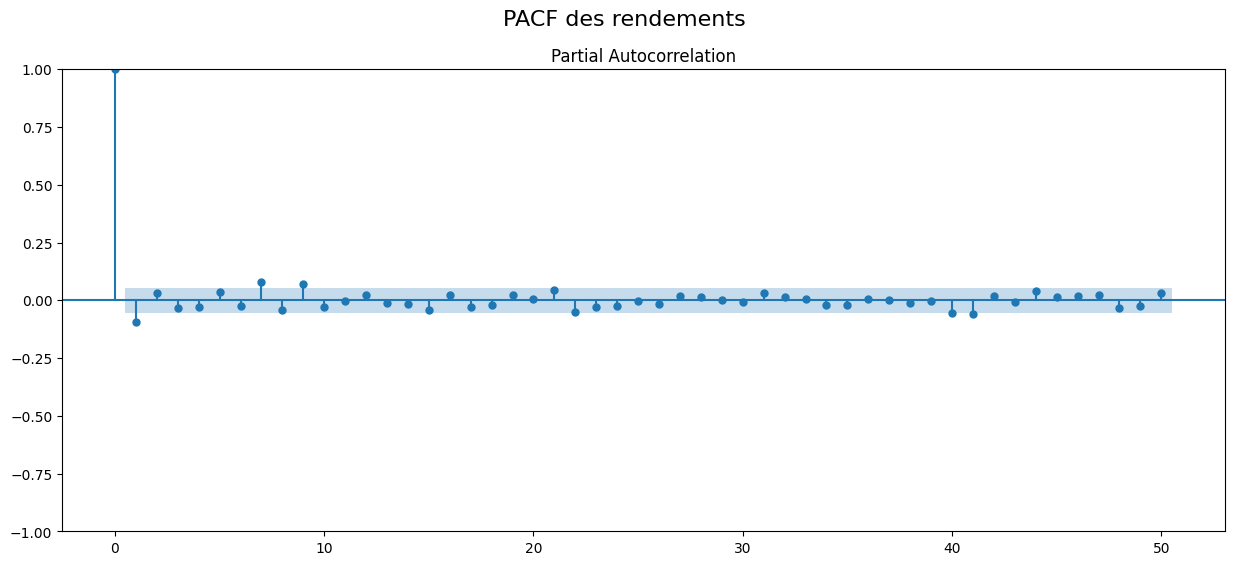

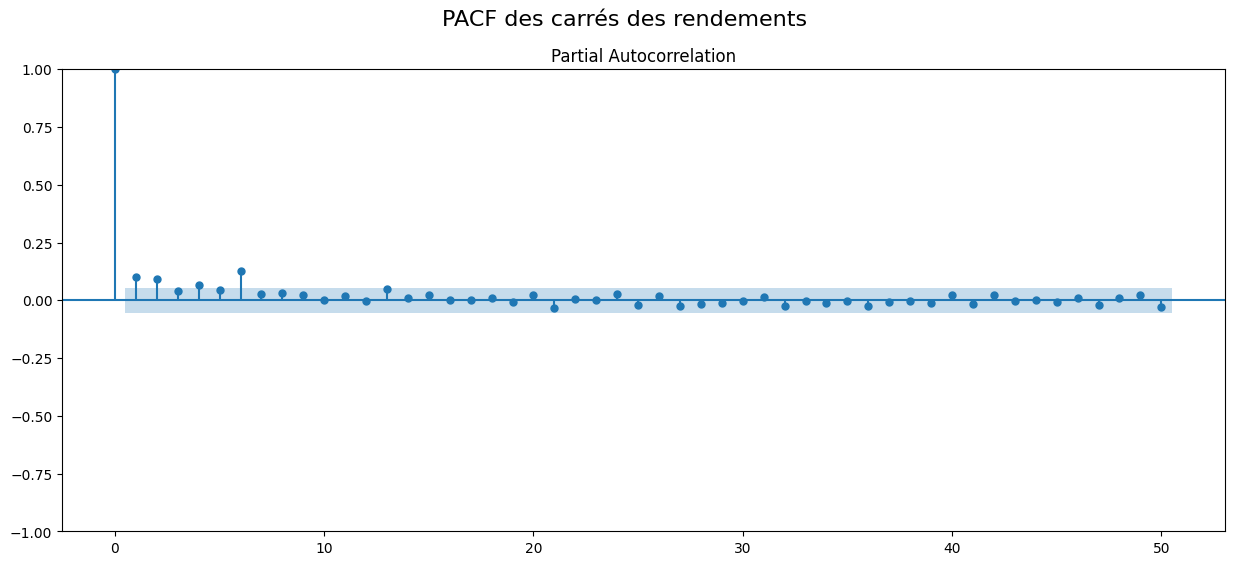

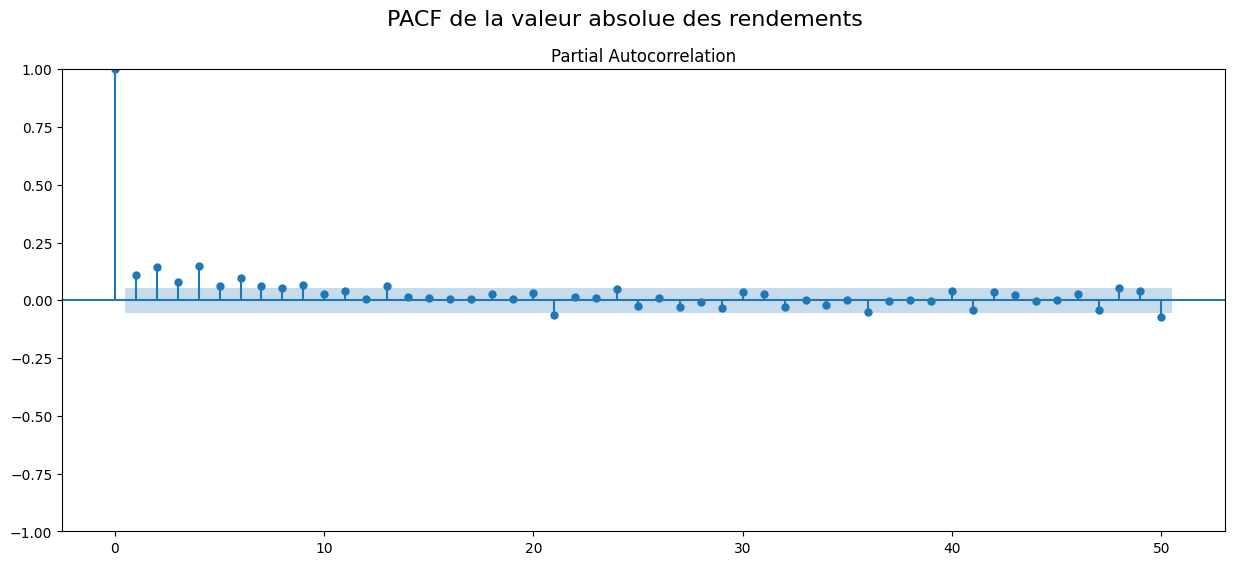

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf

# Tracer le PACF des rendements
plot_pacf(nvidia_returns['NVDA'], lags=50)
plt.suptitle('PACF des rendements', fontsize=16)
plt.show()

# Tracer le PACF des carrés des rendements
plot_pacf(nvidia_returns['NVDA']**2, lags=50)
plt.suptitle('PACF des carrés des rendements', fontsize=16)
plt.show()

# Tracer le PACF de la valeur absolue des rendements
plot_pacf(np.abs(nvidia_returns['NVDA']), lags=50)
plt.suptitle('PACF de la valeur absolue des rendements', fontsize=16)
plt.show()

In [45]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox

# Initialiser les variables pour stocker les meilleurs modèles
best_aic_garch = float("inf")
best_bic_garch = float("inf")
best_order_garch_aic = None
best_order_garch_bic = None
best_model_garch_aic = None
best_model_garch_bic = None

# Seuil de p-valeur pour le test de Ljung-Box
pvalue_threshold = 0.05

# Faire varier les ordres p et q entre 1 et 5 pour GARCH(p, q)
for p in range(1, 6):
    for q in range(1, 6):
        try:
            # Ajuster le modèle GARCH
            model_garch = arch_model(nvidia_returns['NVDA'], vol='Garch', p=p, q=q)
            results_garch = model_garch.fit(disp='off')

            # Test de Ljung-Box sur les résidus standardisés
            ljung_box_test = acorr_ljungbox(results_garch.std_resid, lags=[10], return_df=True)
            pvalue = ljung_box_test['lb_pvalue'].iloc[-1]

            # Vérifier si la p-valeur est supérieure au seuil
            if pvalue > pvalue_threshold:
                # Vérifier et mettre à jour le meilleur modèle selon AIC
                if results_garch.aic < best_aic_garch:
                    best_aic_garch = results_garch.aic
                    best_order_garch_aic = (p, q)
                    best_model_garch_aic = results_garch

                # Vérifier et mettre à jour le meilleur modèle selon BIC
                if results_garch.bic < best_bic_garch:
                    best_bic_garch = results_garch.bic
                    best_order_garch_bic = (p, q)
                    best_model_garch_bic = results_garch

        except Exception as e:
            continue

# Afficher les résultats
print(f"Meilleur modèle GARCH selon AIC: GARCH{best_order_garch_aic} - AIC:{best_aic_garch}")
print(f"Meilleur modèle GARCH selon BIC: GARCH{best_order_garch_bic} - BIC:{best_bic_garch}")

Meilleur modèle GARCH selon AIC: GARCH(5, 2) - AIC:-5036.552538979322
Meilleur modèle GARCH selon BIC: GARCH(1, 1) - BIC:-5007.612895129685


In [ ]:
#

Ljung-Box GARCH(5,2):
      lb_stat  lb_pvalue
10  16.095655   0.096927
Ljung-Box GARCH(1,1):
      lb_stat  lb_pvalue
10  15.596499    0.11178


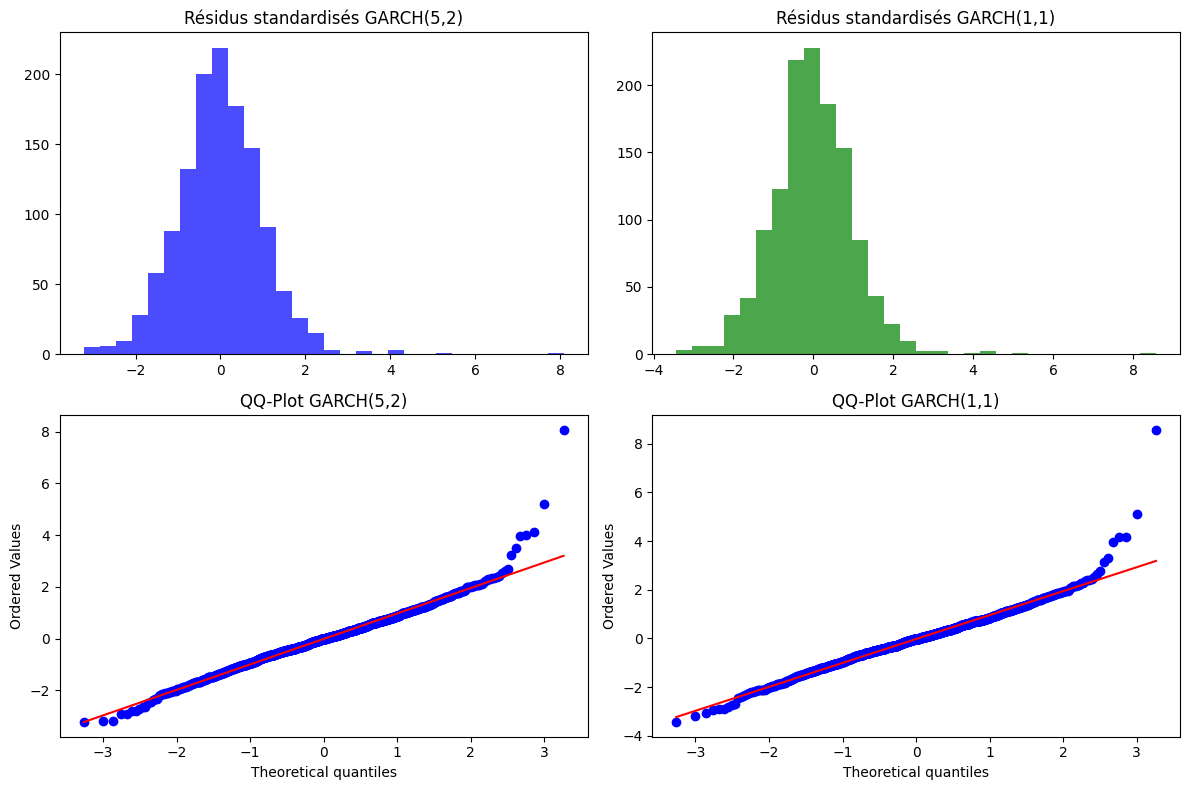

In [46]:

from statsmodels.stats.diagnostic import acorr_ljungbox
import scipy.stats as stats

# Ajuster le modèle GARCH(5,2)
garch_model_52 = arch_model(nvidia_returns['NVDA'], vol='Garch', p=5, q=2)
garch_fit_52 = garch_model_52.fit(disp="off")

# Ajuster le modèle GARCH(1,1)
garch_model_11 = arch_model(nvidia_returns['NVDA'], vol='Garch', p=1, q=1)
garch_fit_11 = garch_model_11.fit(disp="off")

# Résidus standardisés pour GARCH(5,2)
res_52 = garch_fit_52.resid / garch_fit_52.conditional_volatility

# Test de Ljung-Box pour GARCH(5,2)
lb_52 = acorr_ljungbox(res_52, lags=[10], return_df=True)
print("Ljung-Box GARCH(5,2):")
print(lb_52)

# Résidus standardisés pour GARCH(1,1)
res_11 = garch_fit_11.resid / garch_fit_11.conditional_volatility

# Test de Ljung-Box pour GARCH(1,1)
lb_11 = acorr_ljungbox(res_11, lags=[10], return_df=True)
print("Ljung-Box GARCH(1,1):")
print(lb_11)

# Visualisation des résidus et des tests de normalité
plt.figure(figsize=(12, 8))

# Histogramme des résidus pour GARCH(5,2)
plt.subplot(2, 2, 1)
plt.hist(res_52, bins=30, color='blue', alpha=0.7)
plt.title("Résidus standardisés GARCH(5,2)")

# Histogramme des résidus pour GARCH(1,1)
plt.subplot(2, 2, 2)
plt.hist(res_11, bins=30, color='green', alpha=0.7)
plt.title("Résidus standardisés GARCH(1,1)")

# QQ-Plot pour GARCH(5,2)
plt.subplot(2, 2, 3)
stats.probplot(res_52, dist="norm", plot=plt)
plt.title("QQ-Plot GARCH(5,2)")

# QQ-Plot pour GARCH(1,1)
plt.subplot(2, 2, 4)
stats.probplot(res_11, dist="norm", plot=plt)
plt.title("QQ-Plot GARCH(1,1)")

plt.tight_layout()
plt.show()



# Comparaison des modèles GARCH(5,2) et GARCH(1,1)

## 1. Comprendre le test de Ljung-Box
- **Objectif du test** : Vérifier si les résidus (ou résidus standardisés) sont autocorrélés. Un modèle GARCH valide doit produire des résidus non autocorrélés.
- **Hypothèses** :
  - \( H_0 \) (hypothèse nulle) : Les résidus ne présentent **aucune autocorrélation** significative.
  - \( H_a \) (hypothèse alternative) : Les résidus présentent une autocorrélation significative.
- **Interprétation** :
  - Si la **p-value** est > 0.05, on **ne rejette pas \( H_0 \)**. Cela signifie que les résidus ne présentent pas d'autocorrélation significative (le modèle est valide).

---

## 2. Résultats du test de Ljung-Box
| Modèle         | Statistique \ \text{lb_stat}  | p-value          |
|----------------|---------------------------------|------------------|
| **GARCH(5,2)** | \( 16.10 \)                    | \( 0.0969 \)     |
| **GARCH(1,1)** | \( 15.60 \)                    | \( 0.1118 \)     |

### Analyse des p-values :
- **GARCH(5,2)** : \( p = 0.0969 \) (\( > 0.05 \)) -> Pas d'autocorrélation significative.
- **GARCH(1,1)** : \( p = 0.1118 \) (\( > 0.05 \)) -> Pas d'autocorrélation significative.

Les deux modèles produisent des résidus non autocorrélés, mais le modèle **GARCH(1,1)** a une p-value légèrement plus élevée, indiquant qu'il respecte mieux l'hypothèse de non-autocorrélation.

---

## 3. Décision finale
### Si vous choisissez uniquement sur la base du test Ljung-Box :
- **GARCH(1,1)** est légèrement meilleur, car sa p-value est plus grande (\( 0.1118 \) contre \( 0.0969 \)).

### Autres facteurs à considérer :
1. **Critère de sélection (AIC/BIC)** :
   - Si **GARCH(5,2)** est préféré selon l'AIC et que la différence entre les p-values est minime, vous pouvez privilégier le modèle GARCH(5,2) pour sa meilleure capacité prédictive.
   - Si le **BIC** favorise GARCH(1,1), cela signifie que ce modèle est plus simple et plus parsimonieux.

2. **Interprétation et simplicité** :
   - **GARCH(1,1)** est plus simple et souvent suffisant pour capturer la dynamique de la volatilité dans de nombreuses séries financières.

3. **Stabilité des paramètres** :
   - Vérifiez si les coefficients estimés pour les deux modèles sont stables et significatifs.

---

## 4. Conclusion
- Sur la base des p-values du test de Ljung-Box, **GARCH(1,1)** est préféré.
- Cependant, etant donné que notre objectif incluent une meilleure capacité prédictive et que GARCH(5,2) est significativement meilleur selon l'AIC, nous allons privilégier **GARCH(5,2)**, en veillant à vérifier la robustesse des paramètres et des prévisions.
